In [1]:
from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
%matplotlib inline

In [2]:
colnames=['date', 'time', 'page', 'user', 'cohort', 'ip']
df = pd.read_csv('curriculum-access.txt', engine='python',
                 header=None, index_col=False, names=colnames,
                 sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
                 na_values='"-"')

In [3]:
# combine date + time columns, then make it a datetime object, then drop the old columns and set datetime to index
df['datetime'] = pd.to_datetime(df.date + ' ' + df.time)
df = df.drop(columns=['date', 'time']).set_index('datetime')
# drop null page value
df = df.dropna(subset=['page'])
df.head()

,page,user,cohort,ip
datetime,,,,
2018-01-26 09:55:03,/,1,8.0,98.106.20.62
2018-01-26 09:56:02,java-ii,1,8.0,98.106.20.62
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62


In [4]:
df.isna().sum()

page          0
user          0
cohort    27856
ip            0
dtype: int64

In [5]:
# fill nulls in Ada cohort
df[(df.user >= 349) & (df.user <= 369)] = df[(df.user >= 349) & (df.user <= 369)].fillna(30.0)
df[df.user == 429] = df[df.user == 429].fillna(30.0)
df[df.user == 48] = df[df.user == 48].fillna(21.0)
df[df.user == 372] = df[df.user == 372].fillna(30.0)
df[df.user == 544] = df[df.user == 544].fillna(30.0)
df[df.user == 406] = df[df.user == 406].fillna(30.0)
df[df.user == 403] = df[df.user == 403].fillna(30.0)
df[df.user == 375] = df[df.user == 375].fillna(31.0)

# add sections
df['section'] = np.where(df.cohort == 55, 'ds',
                             np.where(df.cohort == 34, 'ds',
                                     np.where(df.cohort == 30, 'ds',
                                             np.where(df.cohort == 28, 'staff',
                                                      np.where(df.cohort == 1, 'staff_1',
                                                               np.where(df.cohort == 8, 'staff','web_dev'))))))

df.head()

,page,user,cohort,ip,section
datetime,,,,,
2018-01-26 09:55:03,/,1,8.0,98.106.20.62,staff
2018-01-26 09:56:02,java-ii,1,8.0,98.106.20.62,staff
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62,staff
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62,staff
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62,web_dev


In [6]:
df.isna().sum()

page          0
user          0
cohort     3620
ip            0
section       0
dtype: int64

In [7]:
df[df.cohort.isna()].user.value_counts().sort_index()

54     146
58     462
59      42
61     816
62       4
63      23
64      25
73      84
74      80
78      53
79     270
86     177
88     327
89       3
100     59
103     46
111    753
137     10
166     77
176      3
213     21
247     66
317     73
Name: user, dtype: int64

In [8]:
# this one is weird...
df[df.user == 64].cohort.value_counts(dropna=False)

28.0    6967
1.0     3767
52.0      25
NaN       25
Name: cohort, dtype: int64

In [76]:
ds = df[df.section == 'ds']
ds.head()

,page,user,cohort,ip,section
datetime,,,,,
2019-02-04 16:22:20,/,349,30.0,98.106.20.59,ds
2019-02-04 16:22:36,/,350,30.0,98.106.20.59,ds
2019-02-04 16:23:07,1._Fundamentals,350,30.0,98.106.20.59,ds
2019-02-04 16:23:34,/,351,30.0,98.106.20.59,ds
2019-02-04 16:36:36,/,352,30.0,98.106.20.59,ds


In [77]:
ds = ds.page.resample('D').count()
ds

datetime
2019-02-04     32
2019-02-05     35
2019-02-06    103
2019-02-07    118
2019-02-08     63
             ... 
2020-05-11    141
2020-05-12    107
2020-05-13    118
2020-05-14    110
2020-05-15     98
Freq: D, Name: page, Length: 467, dtype: int64

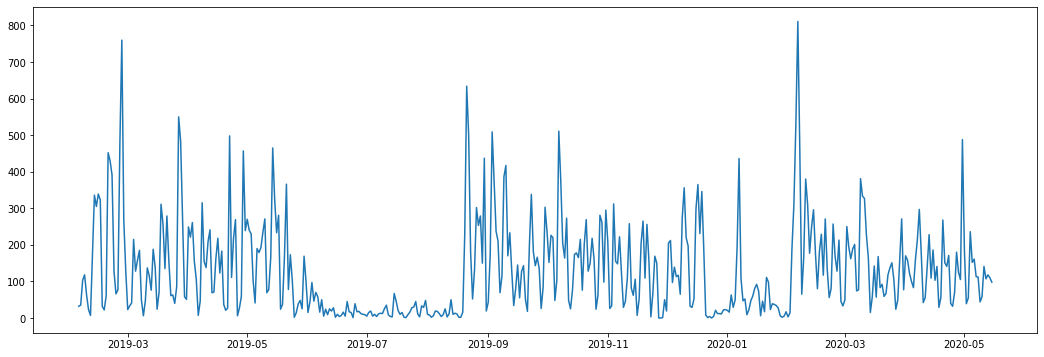

In [79]:
plt.figure(figsize=(18, 6))
sns.lineplot(data=ds)

In [80]:
ada = df[df.cohort == 30]
bayes = df[df.cohort == 34]
curie = df[df.cohort == 55]

ada_daily = ada.page.resample('D').count()
bayes_daily = bayes.page.resample('D').count()
curie_daily = curie.page.resample('D').count()

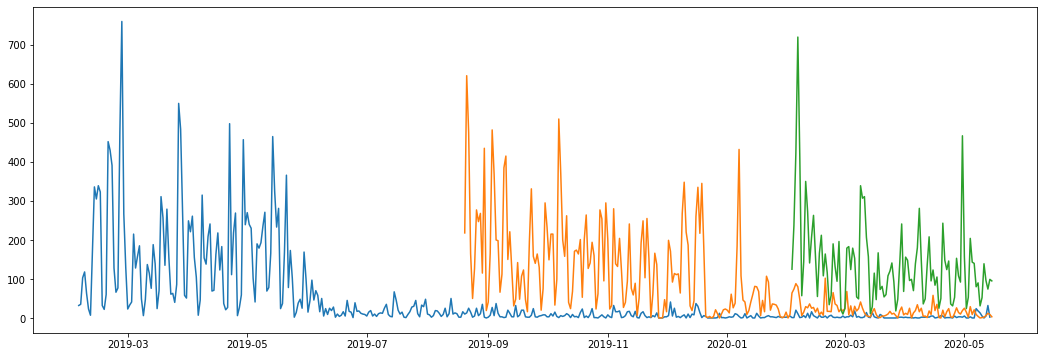

In [82]:
plt.figure(figsize=(18, 6))
sns.lineplot(data=ada_daily)
sns.lineplot(data=bayes_daily)
sns.lineplot(data=curie_daily)